<a href="https://colab.research.google.com/github/UICHANLEE/2023_DataScience/blob/ML/3%EC%9E%A5_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장 평가 
- 머신러닝은 데이터 가공/변환, 모델 학습/예측, 그리고 평가의 프로세스로 구성
- 회귀 : 실제값과 예측값의 오차의 평균 ( 낮을 수록 좋은 것 )
- 분류 : 실제 결과 데이터와 예측 데이터가 얼마나 정확한지 ( 높을 수록 좋은 것 )

- 분류의 성능 평가 지표
  1. 정확도 (Accuracy)
  2. 오차행렬 (Confusion Matrix)
  3. 정밀도 (Precision)
  4. 재현율 (Recall)
  5. F1 스코어
  6. ROC AUC

# 1 정확도 (Accuracy)
- 정확도는 시계 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# 원본데이터를 재로딩, 데이터 가공, 학습 데이터/ 테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassfier(BaseEstimator):
  # fit() 메소드는 아무것도 학습하지 않음
  def fit(self, X, y = None):
    pass
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Age'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)
  return df
# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
  return df
# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df
# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df


In [5]:
X_titanic_df = transform_features(X_titanic_df)

In [6]:
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,8,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,8,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,8,3


In [7]:
X_train, X_test, y_train, y_test =  train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

In [8]:
myclf = MyDummyClassfier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier 의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier 의 정확도는 : 0.7877


 # 불균형한 데이터셋

#### MNIST 데이터셋

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  def predict(self, X):
    return np.zeros((len(X), 1) , dtype=bool)

digits = load_digits()


In [10]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [12]:
# DummyClassifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)

print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test, fakepred)))

모든 예측을 0으로 하여도 정확도는 : 0.900


# 2 오차행렬(Confusion Matrix)
- TN : 실제도 아니고 예측도 아니라고 한 것
- FN : 실제가 맞고 예측은 아니라고 한 것
- FP : 실제가 아니고 예측은 맞다고 한 것
- TP : 실제도 맞고 예측도 맞다고 한 것

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred) # (실제값, 예측값)


array([[405,   0],
       [ 45,   0]])

In [14]:
confusion_matrix(fakepred, y_test) # (예측값, 실제값의 경우) - 원하는 값이 나오지않음

array([[405,  45],
       [  0,   0]])

- 정확도 = (TN + TP) / (TN + FP + FN + TP) 
- 정밀도 = TP / (FP + TP) -  예측을  Positive 로 한 대상중에서 예측값이 실제와 일치한 데이터의 비율
- 재현율 = TP / (FN + TP) - 실제값이 Positive인 대상 중에서 예측과 실제값이 Positive로 일치한 데이터의 비율

In [15]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix

In [16]:
from IPython.utils.syspathcontext import prepended_to_syspath
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도;{0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.20, random_state= 11)
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


오차 행렬
[[108  10]
 [ 14  47]]
정확도;0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [18]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape :{0}'.format(pred.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 concatenate하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba()결과 Shape :(179,)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.44890748 0.55109252]
 [0.86309497 0.13690503]
 [0.86409996 0.13590004]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.44890748 0.55109252 1.        ]
 [0.86309497 0.13690503 0.        ]
 [0.86409996 0.13590004 0.        ]]


In [19]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold= 1.1)
print(binarizer.fit_transform(X))


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [20]:
from sklearn.preprocessing import Binarizer
# Binarizer 의 threshold 설정값, 분류 결정 임계값

custom_threshold = 0.5

# predict_proba() 반환값이 두 번째 칼럼, 즉 Positive클래스 칼럼 하나만 추출해 Binarizer을 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도;0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [21]:
custom_threshold = 0.4

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도;0.8212, 정밀도 : 0.7042, 재현율 : 0.8197


In [22]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값: ',custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도;0.8212, 정밀도 : 0.7042, 재현율 : 0.8197
임곗값:  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도;0.8547, 정밀도 : 0.7869, 재현율 : 0.7869
임곗값:  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도;0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
임곗값:  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도;0.8715, 정밀도 : 0.8654, 재현율 : 0.7377
임곗값:  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도;0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


In [23]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 떄의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))


반환된 분류 결정 임곗값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.12 0.13 0.15 0.17 0.26 0.38 0.5  0.64 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.451 0.519 0.618 0.689 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.77  0.656 0.443 0.213]


# 4 F1 스코어
- F1 스코어는 정밀도와 재현율을 결합한 지표
- 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

In [24]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [25]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  # F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도;{0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
  
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.4
오차행렬
[[97 21]
 [11 50]]
정확도;0.8212, 정밀도 : 0.7042, 재현율 : 0.8197, F1 : 0.7576
임곗값:  0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도;0.8547, 정밀도 : 0.7869, 재현율 : 0.7869, F1 : 0.7869
임곗값:  0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도;0.8659, 정밀도 : 0.8246, 재현율 : 0.7705, F1 : 0.7966
임곗값:  0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도;0.8715, 정밀도 : 0.8654, 재현율 : 0.7377, F1 : 0.7965
임곗값:  0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도;0.8771, 정밀도 : 0.8980, 재현율 : 0.7213, F1 : 0.8000


# 5 ROC 곡선과 AUC
- 비율이 1이 가까워질 수록 더 좋은 값

In [26]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값: [1.94 0.87 0.63 0.55 0.45 0.38 0.31 0.23 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.059 0.127 0.186 0.212 0.347 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.    0.246 0.672 0.738 0.787 0.836 0.869 0.902 0.951 0.967 1.   ]


# 6 피마 인디언 당뇨병 예측

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler # 스케일링
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts()) # 데이터의 분포 확인
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
from scipy.sparse.linalg.isolve.iterative import non_reentrant
def get_clf_eval(y_test, pred, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC_AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print('정확도;{0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
  

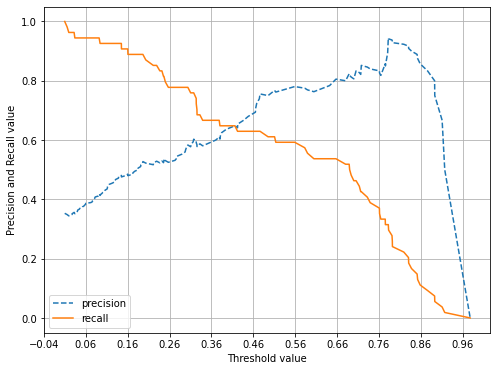

In [33]:
def precision_recall_curve_plot(y_test = None, pred_proba_c1 = None):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize = (8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0: threshold_boundary],linestyle = '--', label = 'precision')
  plt.plot(thresholds, recalls[0: threshold_boundary], label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [34]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


ValueError: ignored

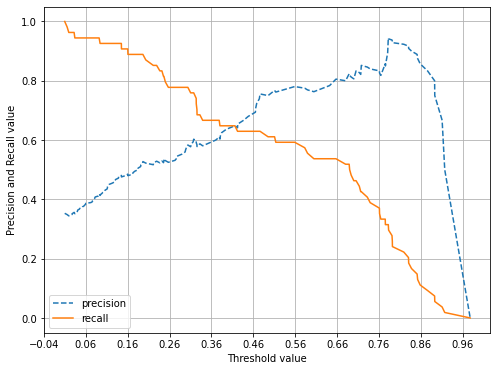

In [35]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1] # x -> 특성들의 집합
precision_recall_curve_plot(y_test, pred_proba_c1)


In [36]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


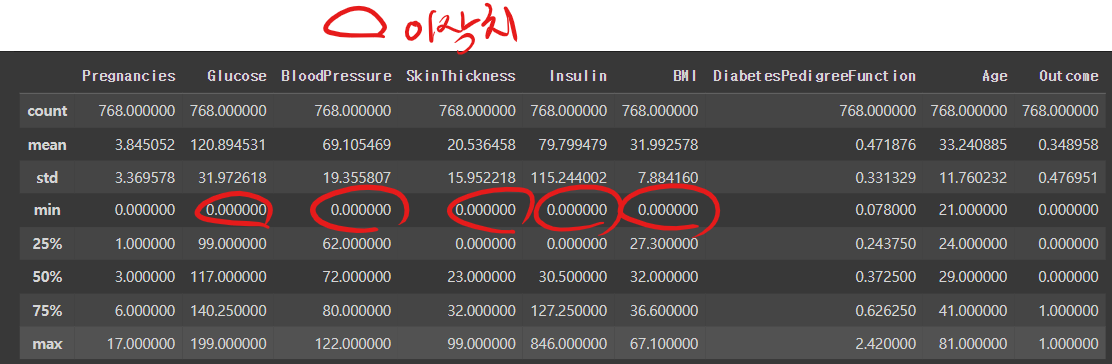

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

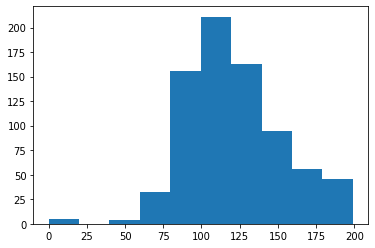

In [37]:
plt.hist(diabetes_data['Glucose'], bins = 10)

In [38]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # 이상치 값들 갯수 세기

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [39]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체
mean_zero_feature = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_feature)

In [40]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)


오차행렬
[[90 10]
 [21 33]]
정확도;0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC:0.8433


In [41]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)t
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.3


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


ValueError: ignored